In [20]:
! pip install html5lib
import requests
import json
import csv
import pandas as pd
from bs4 import BeautifulSoup
import html5lib
import numpy as np
from matplotlib import pyplot as plt

lat="42.098701"
lon="-75.912537"

genius=requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file=genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [21]:
forecast = json_file["properties"]["forecast"]
forecast_one = requests.get(forecast)

json = forecast_one.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-21T02:21:30+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T03:28:49+00:00',
  'updateTime': '2023-03-21T02:21:30+00:00',
  'validTimes': '2023-03-20T20:00:00+00:00/P7DT17H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T23:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
    'i

In [22]:
variable = json["properties"]["periods"]
variable

[{'number': 1,
  'name': 'Tonight',
  'startTime': '2023-03-20T23:00:00-04:00',
  'endTime': '2023-03-21T06:00:00-04:00',
  'isDaytime': False,
  'temperature': 31,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 20},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -6.666666666666667},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 61},
  'windSpeed': '6 mph',
  'windDirection': 'S',
  'icon': 'https://api.weather.gov/icons/land/night/few/snow,20?size=medium',
  'shortForecast': 'Mostly Clear then Slight Chance Snow Showers',
  'detailedForecast': 'A slight chance of snow showers after 5am. Mostly clear, with a low around 31. South wind around 6 mph. Chance of precipitation is 20%.'},
 {'number': 2,
  'name': 'Tuesday',
  'startTime': '2023-03-21T06:00:00-04:00',
  'endTime': '2023-03-21T18:00:00-04:00',
  'isDaytime': True,
  'temperature': 55,
  'temperatureUnit': 'F',
  'temperatureTre

<function matplotlib.pyplot.show(close=None, block=None)>

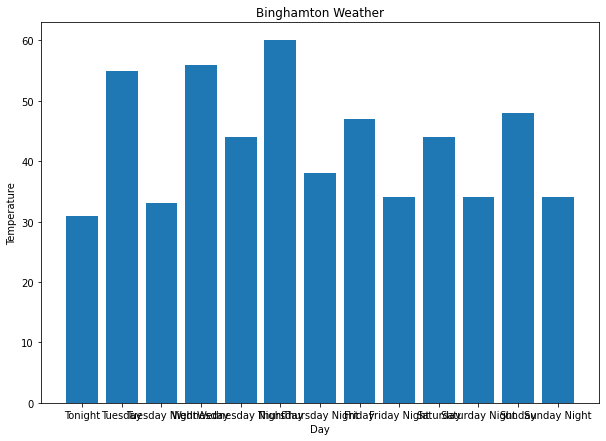

In [27]:
df=pd.DataFrame(view)

day = df["Day"]

temp= df["Temp"]

fig=plt.figure(figsize=(10,7))
plt.bar(day[0:13], temp[0:13])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Binghamton Weather")

plt.show

In [24]:
Lab7_csv = open("forecast.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(Lab7_csv)
csv_writer.writerow(['Day', 'Temp', 'Forecast'])

for i in variable:
    day = i["name"]
    
    temperature = i["temperature"]
    
    forecast_details = i["detailedForecast"]
    
    csv_writer.writerow([day, temperature, forecast_details])
    
Lab7_csv.close()

view = pd.read_csv("forecast.csv")
    